# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_training
import plotting_utils

/home/vrtx26/.local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# run this function if you need to generate a csv data set from scratch
# data_loader.generate_csv_dataset()

In [25]:
X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_8192.csv', 
                                    y_path='data/y_labels_8192.csv',
                                    ID_path='data/IDs_8192.csv')

data loaded in 0.029064416885375977ms
          0         1         2         3         4         5         6  \
0  0.345203 -0.433601 -0.578419 -1.323835 -0.680025 -0.028385 -1.330347   
1 -0.472124 -0.498498  0.112059 -0.830824 -0.133227 -0.049598 -0.812726   
2 -0.848489  0.494677 -0.151049 -0.482602 -0.010413  1.085948 -0.164157   
3  0.868686 -1.375276 -0.092567 -1.910069 -0.239241 -0.146946 -1.297258   
4  0.508706 -1.448286 -0.742764 -1.639593 -0.543989 -0.377626 -1.206869   

          7         8         9  ...        70        71        72        73  \
0 -1.074133 -1.305603  0.427557  ...  0.299369  1.562294  0.980033  0.367083   
1 -0.462068 -0.835043  0.066239  ...  2.302647  1.900227 -0.147289  0.357644   
2 -0.486912 -0.812179  0.508495  ...  1.225351  2.147239  2.505527  2.098245   
3 -0.738021 -1.705054 -0.068063  ... -0.138589 -0.871316  0.314555  0.535041   
4 -0.206688 -1.029338  0.273764  ... -0.775648 -0.046936 -0.524805 -0.010637   

         74        75        7

In [26]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [27]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with Linear kernel

### Train & evaluate function

### Grid Search (C)

 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 19.61it/s]

UAR = 0.442


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 16.58it/s]

UAR = 0.437


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 13.96it/s]

UAR = 0.423


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 14.16it/s]

UAR = 0.439


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  9.94it/s]

UAR = 0.431


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.83it/s]

UAR = 0.428


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.16it/s]

UAR = 0.432


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.09it/s]

UAR = 0.419


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.42it/s]

UAR = 0.405


Text(0, 0.5, 'UAR')

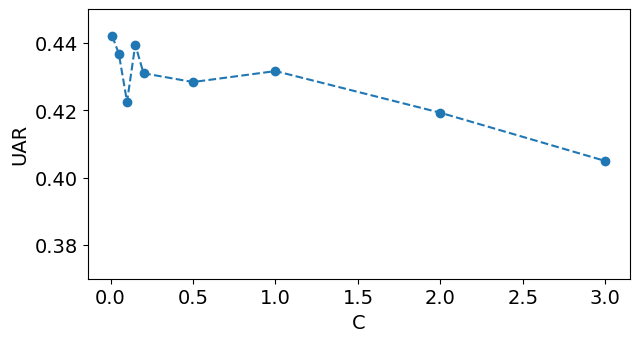

In [31]:
C = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0, 2.0, 3.0]
UAR_list = []
UAR_best = 0
for val_C in C:
    model = SVC(kernel = 'linear', C=val_C)
    UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
    if UAR_best<UAR:
        UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
    UAR_list.append(UAR)

fig,ax=plt.subplots(figsize=(7,3.5))
plt.rcParams.update({'font.size': 14})
plt.plot(C,UAR_list, marker='o', linestyle='dashed',)
plt.ylim([0.37, 0.45])
plt.xlabel('C')
plt.ylabel('UAR')

In [32]:
10**(C_best)

1.0508587552139304

## Results and confusion matrix

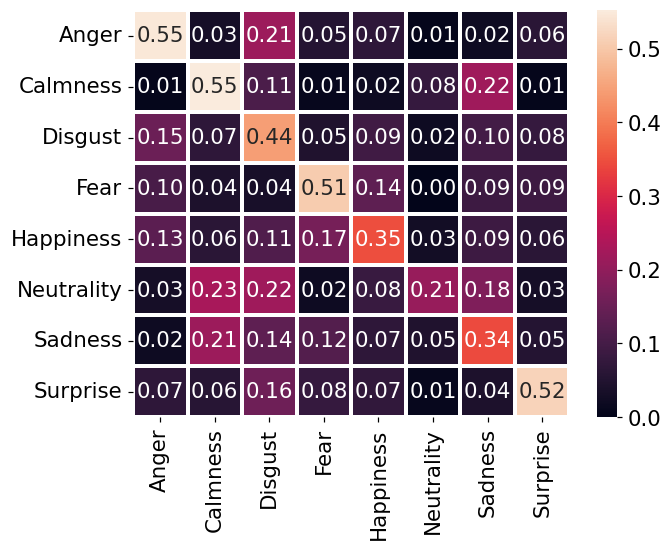

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [7]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)

# SVM (version 2)

In [34]:
# C = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0, 2.0, 3.0, 10.0]
C = np.logspace(-2, 1, 10, endpoint=True)
UAR_list = []
UAR_best = 0
C_best = 0
for val_C in C:
    model = SVC(kernel = 'linear', C=val_C, decision_function_shape='ovr',break_ties=True)
    UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
    if UAR_best<UAR:
        UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te        
        C_best = val_C
    UAR_list.append(UAR)

 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 19.03it/s]

UAR = 0.439


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 19.60it/s]

UAR = 0.447


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 16.58it/s]

UAR = 0.436


 40%|█████████████████████████████████████████████████████████████████████████▌                                                                                                              | 2/5 [00:00<00:00, 12.89it/s]

UAR = 0.425


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  8.45it/s]

UAR = 0.428


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.92it/s]

UAR = 0.417


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.413


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.407


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.393


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.87it/s]

UAR = 0.378


## Plot GridSearch results

UAR_best = 0.447, C_best = 0.022


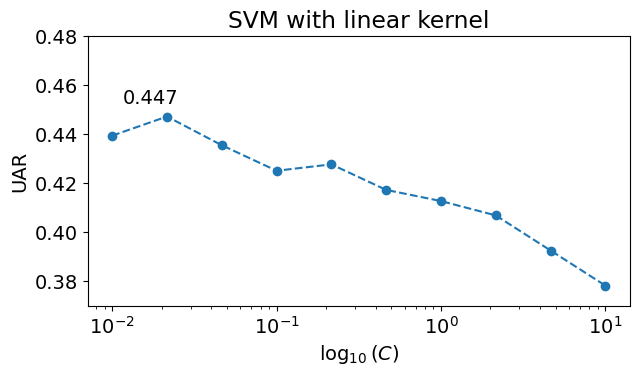

In [35]:
fig,ax=plt.subplots(figsize=(7,3.5))
plt.rcParams.update({'font.size': 14})
# plt.plot(C,UAR_list, marker='o', linestyle='dashed',)
plt.semilogx(C,UAR_list, marker='o', linestyle='dashed',)
plt.ylim([0.37, 0.48])
plt.xlabel('$\log_{10}(C)$')
plt.ylabel('UAR')
plt.text(C_best-0.010, UAR_best+0.005, f'{UAR_best:.3f}')
plt.title('SVM with linear kernel')
print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.3f}')

In [36]:
10**(C_best)

1.0508587552139304

## Results and confusion matrix

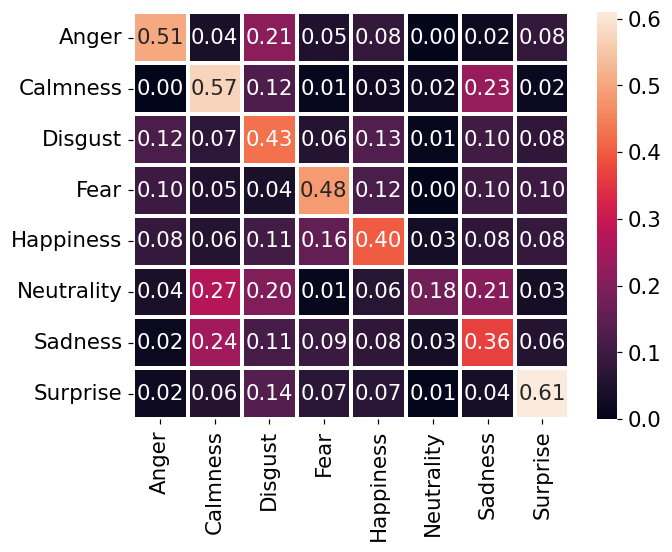

Saving confusion matrix with name:  Doc/figures/confusion_matrix_eng.jpg


In [10]:
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred)